# ANZ: Virtual Experience Program about Data (via [InsideSherpa](https://www.insidesherpa.com/virtual-internships/prototype/ZLJCsrpkHo9pZBJNY/Data%40ANZ%20Program))

Background:

> This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.
  The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

In [70]:
!git pull origin master

To https://github.com/Zeeniye/data-anz-virtual-internship-insidesherpa.git
   33702bf..31417b0  master -> master


### Exploratory Data Analysis + Preprocessing Data

In [1]:
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

pio.renderers.default = 'png'

In [2]:
trans_df = pd.read_excel('ANZ synthesised transaction dataset.xlsx', parse_dates=['date'], index_col='date')
len(trans_df)

12043

In [3]:
trans_df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
date,,,,,,,,,,,,,,,,,,,,,
2018-08-01,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
2018-08-01,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2018-08-01,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
2018-08-01,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
2018-08-01,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


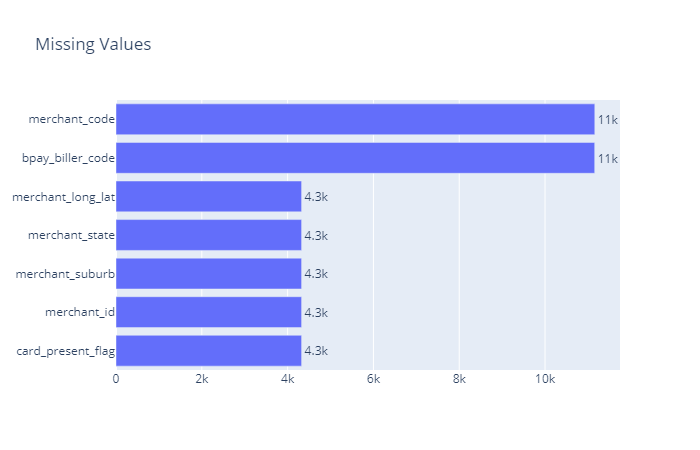

In [4]:
trans_null_col = trans_df.columns[trans_df.isnull().any()]

fig = go.Figure(data=
    go.Bar(y = trans_null_col, 
           x = trans_df[trans_null_col].isnull().sum().values, 
           text = trans_df[trans_null_col].isnull().sum().values,
           texttemplate = '%{text:.2s}',
           textposition = 'outside',
           orientation='h'
          )
)

fig.update_layout(title='Missing Values', yaxis={'categoryorder':'total ascending'})
fig.show()

In [5]:
## Missing value h-bar percentage
# trans_percent_sum = trans_df[trans_null_col].isnull().sum().values / len(trans_df) * 100

# fig = go.Figure(data=
#     go.Bar(y = trans_null_col, 
#            x = trans_percent_sum, 
#            text = trans_percent_sum,
#            texttemplate = '%{text:.2f}%',
#            textposition = 'outside',
#            orientation='h'
#           )
# )

# fig.update_layout(title='Missing Values', yaxis={'categoryorder':'total ascending'})
# fig.show()

In [6]:
trans_df.describe().T

,count,mean,std,min,25%,50%,75%,max
card_present_flag,7717.0,0.802644,0.398029,0.00,1.000,1.00,1.000,1.00
merchant_code,883.0,0.000000,0.000000,0.00,0.000,0.00,0.000,0.00
balance,12043.0,14704.195553,31503.722652,0.24,3158.585,6432.01,12465.945,267128.52
age,12043.0,30.582330,10.046343,18.00,22.000,28.00,38.000,78.00
amount,12043.0,187.933588,592.599934,0.10,16.000,29.00,53.655,8835.98


In [7]:
trans_df.describe(include='O').T

,count,unique,top,freq
status,12043,2,authorized,7717
bpay_biller_code,885,3,0,883
account,12043,100,ACC-1598451071,578
currency,12043,1,AUD,12043
long_lat,12043,100,153.41 -27.95,578
txn_description,12043,6,SALES-POS,3934
merchant_id,7717,5725,106e1272-44ab-4dcb-a438-dd98e0071e51,14
first_name,12043,80,Michael,746
gender,12043,2,M,6285
merchant_suburb,7717,1609,Melbourne,255


In [8]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12043 entries, 2018-08-01 to 2018-10-31
Data columns (total 22 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 non-null object
merchant_long_lat  

In [9]:
trans_copy = trans_df.copy()
trans_df = trans_df.drop(['bpay_biller_code', 'merchant_code'], axis=1)
trans_copy2 = trans_df.copy()

In [10]:
trans_null_col = trans_df.columns[trans_df.isnull().any()]

for col in trans_null_col:
    print(trans_df[trans_df['merchant_id'].isnull()][col].value_counts(), end='\n\n')
    
# The missing values in these columns are all on the same row eachs

Series([], Name: card_present_flag, dtype: int64)

Series([], Name: merchant_id, dtype: int64)

Series([], Name: merchant_suburb, dtype: int64)

Series([], Name: merchant_state, dtype: int64)

Series([], Name: merchant_long_lat, dtype: int64)



In [11]:
for col in trans_null_col:
    print(trans_df[col].value_counts(), end='\n\n')

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

106e1272-44ab-4dcb-a438-dd98e0071e51    14
6c84c219-96ea-4c6f-9de5-0a28bcaec62f    12
e28c426d-cbef-4e2d-aa06-1ba0b6b1902f    11
aef30de1-c67e-4ab7-8577-2931a4bf3c7e    10
6ddddc40-5b69-4253-8a26-167999a8bf96    10
                                        ..
628590ed-7c27-4424-a5cf-d956aa151836     1
165332da-96c4-4df6-b327-5c9ba6953102     1
5337b0c4-38a4-4511-ab71-bd32cc61910e     1
0063d66f-b665-435f-9282-ab648d9e68cd     1
f7643a90-424d-46ec-97ee-320406f77268     1
Name: merchant_id, Length: 5725, dtype: int64

Melbourne           255
Sydney              233
Southport            82
Brisbane City        79
Chatswood            55
                   ... 
Riverhills            1
Australind            1
Ballarat              1
Parkinson             1
Noble Park North      1
Name: merchant_suburb, Length: 1609, dtype: int64

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: 

###### if impute missing values needed

In [12]:
# trans_df['card_present_flag'] = trans_df['card_present_flag'].apply(lambda x: 0 if pd.isnull(x) else x)

In [13]:
# m_id = trans_df.groupby(['customer_id'])['merchant_id'].agg(lambda x: x.value_counts().index[0])
# m_state = trans_df.groupby(['customer_id'])['merchant_state'].agg(lambda x: x.value_counts().index[0])
# m_suburb = trans_df.groupby(['customer_id'])['merchant_suburb'].agg(lambda x: x.value_counts().index[0])
# m_ll = trans_df.groupby(['customer_id'])['merchant_long_lat'].agg(lambda x: x.value_counts().index[0])

In [14]:
# df_non = trans_df[trans_df['merchant_id'].notnull()]
# df_null = trans_df[trans_df['merchant_id'].isnull()]

# df_null = df_null.drop(list(df_null.columns[df_null.isnull().any()]), axis = 1)
# df_null = df_null.reset_index().merge(m_id, how='left', on='customer_id').set_index('date')
# df_null = df_null.reset_index().merge(m_state, how='left', on='customer_id').set_index('date')
# df_null = df_null.reset_index().merge(m_ll, how='left', on='customer_id').set_index('date')
# df_null = df_null.reset_index().merge(m_suburb, how='left', on='customer_id').set_index('date')
# df_null = df_null[list(df_non.columns)]

# trs_df = pd.concat([df_non, df_null])

###### Change and add extract new features

In [15]:
trans_df['age'] = trans_df['age'].apply(lambda x: '15-24' if 14<x<25 else('25-54' if 24<x<55 else('55-64' if 54<x<65 else('65>' if x>64 else '<14'))))

In [16]:
trans_df['long_cust'] = trans_df['long_lat'].apply(lambda x: float(x.split(' ')[0]))
trans_df['lat_cust'] = trans_df['long_lat'].apply(lambda x: float(x.split(' ')[1]))
trans_df = trans_df.drop(['long_lat'], axis=1)

###### State Processing

I changed the long_lat for this customer with the merchant_long_lat based on customer_id

In [17]:
trans_df[trans_df['customer_id'] == 'CUS-1617121891'].iloc[3] # The longitude & latitude absolutely wrong!!

status                                         posted
card_present_flag                                 NaN
account                                ACC-2901672282
currency                                          AUD
txn_description                            PAY/SALARY
merchant_id                                       NaN
first_name                                     Daniel
balance                                       4490.85
gender                                              M
age                                             15-24
merchant_suburb                                   NaN
merchant_state                                    NaN
extraction               2018-08-03T17:00:00.000+0000
amount                                        3328.77
transaction_id       035f7e013df6486f80e2245bea04a28f
country                                     Australia
customer_id                            CUS-1617121891
merchant_long_lat                                 NaN
movement                    

In [18]:
gb1_df = trans_df[(trans_df['customer_id'] == 'CUS-1617121891')]
gb1_df['merchant_long_lat'].value_counts()

151.21 -33.87    13
144.96 -37.82     3
153.02 -27.47     2
145.09 -37.9      2
151.2 -33.87      2
                 ..
151.21 -33.84     1
149.1 -35.32      1
144.97 -37.81     1
151.19 -33.87     1
115.81 -31.86     1
Name: merchant_long_lat, Length: 62, dtype: int64

In [19]:
gb1_df['merchant_state'].value_counts()

NSW    39
VIC    19
QLD    11
WA      5
SA      3
ACT     2
Name: merchant_state, dtype: int64

In [20]:
trans_df['long_cust'] = trans_df['long_cust'].replace([255], 151.21)
trans_df['lat_cust'] = trans_df['lat_cust'].replace([-573], -33.87)
trans_df['txn_description'] = trans_df['txn_description'].replace(['PHONE BANK', 'INTER BANK'], ['PHONEBANK', 'INTERBANK'])

In [21]:
trans_df[trans_df['customer_id'] == 'CUS-1617121891'].iloc[3][['long_cust','lat_cust']].values

array([151.21, -33.87], dtype=object)

###### Extract customer state based on merchant_state (If can)

In [22]:
def cek_similar_long_lat(columns, the_df):
    long_l, lat_l = [], []
    for i in the_df[the_df[columns].notnull()][columns].values:
        long, lat = i.split(' ')
        long, lat = float(long), float(lat)
        long_l.append(long)
        lat_l.append(lat)
    return long_l, lat_l

In [23]:
merch1, merch2 = cek_similar_long_lat('merchant_long_lat', trans_copy2)
cust1, cust2 = cek_similar_long_lat('long_lat', trans_copy2)

In [24]:
trans_df['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTERBANK      742
PHONEBANK      101
Name: txn_description, dtype: int64

In [25]:
len(trans_df[(trans_df['txn_description'] == 'SALES-POS') & (trans_df['card_present_flag'] == 0)]['status']), len(trans_df[(trans_df['txn_description'] == 'POS') & (trans_df['card_present_flag'] == 0)]['status'])

(765, 758)

In [26]:
min(cust1), max(cust1), min(cust2), max(cust2)

(114.62, 255.0, -573.0, -12.37)

In [27]:
min(merch1), max(merch1), min(merch2), max(merch2)

(113.83, 153.61, -43.31, -12.33)

In [28]:
all(elem in merch1 for elem in cust1), all(el in merch2 for el in cust2)

(False, False)

###### Extract customer state based on geographical way

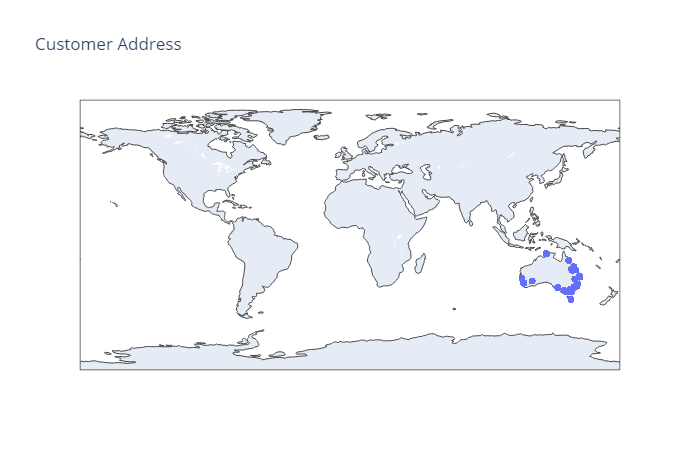

In [29]:
fig = go.Figure(data=go.Scattergeo(
        lon = trans_df['long_cust'],
        lat = trans_df['lat_cust'],
        text = trans_df['amount'],
        mode = 'markers'
        ))

fig.update_layout(
        title = 'Customer Address',
        geo_scope='world',
    )
fig.show()

In [30]:
def customer_state_gen(col):
    '''
    > Customer Address by State

    long=x, lat=y 

    * WA = x<125.0
    * NT = 125.0<x<134.0, y>-27.0
    * SA = 125.0<x<140.0, y<-27.0
    * TAS = y<-40.0
    * QLD = x>134.0, y>-28.9
    * VIC = x>140.0, y<-36.1
    * ACT = x==149.03, y=-35.25
    * NSW = x>140.0, y>-34.5
    '''
    long, lat = col
    
    if long < 125.0:
        return 'WA'
    elif (125.0 < long < 134.0) and (lat > -27.0):
        return 'NT'
    elif (125.0 < long < 140.0) and (lat < -27.0):
        return 'SA'
    elif lat < -40.0:
        return 'TAS'
    elif long > 134.0 and lat > -28.9:
        return 'QLD'
    elif long > 140.0 and lat < -36.1:
        return 'VIC'
    elif long == 149.03 and lat == -35.25:
        return 'ACT'
    return 'NSW'

In [31]:
trans_copy3 = trans_df.copy()

In [32]:
trans_df['customer_state'] = trans_df[['long_cust', 'lat_cust']].apply(customer_state_gen, axis=1) 

In [33]:
trans_df.head(2)

,status,card_present_flag,account,currency,txn_description,merchant_id,first_name,balance,gender,age,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,long_cust,lat_cust,customer_state
date,,,,,,,,,,,,,,,,,,,,,
2018-08-01,authorized,1.0,ACC-1598451071,AUD,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,F,25-54,...,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95,QLD
2018-08-01,authorized,0.0,ACC-1598451071,AUD,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,F,25-54,...,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95,QLD


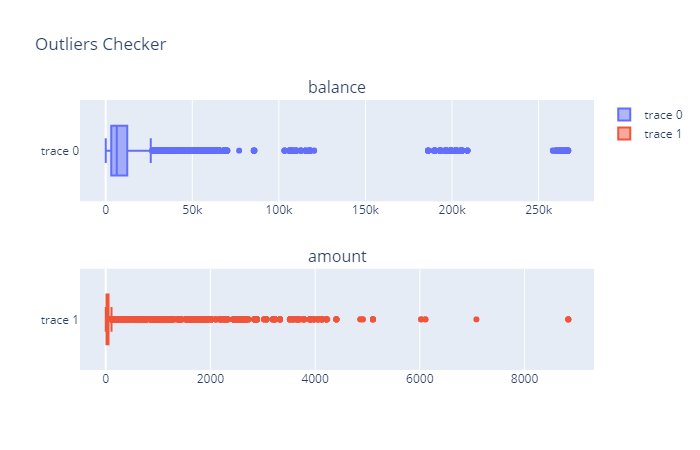

In [34]:
# it shows like the outlier does exist in extreme way, so we use median too be the scale along with mean just to be sure
fig = make_subplots(rows=2, 
                    cols=1,
                    subplot_titles=('balance', 'amount')
                   )

fig.add_trace(go.Box(x=trans_df['balance']),
              row=1, col=1)

fig.add_trace(go.Box(x=trans_df['amount']),
              row=2, col=1)

fig.update_layout(height=700, width=850,
                  title_text='Outliers Checker')

fig.show()

In [35]:
merch_long = trans_df[trans_df['merchant_long_lat'].notnull()]['merchant_long_lat'].apply(lambda x: float(x.split(' ')[0]) if pd.notnull(x) else x)
merch_lat = trans_df[trans_df['merchant_long_lat'].notnull()]['merchant_long_lat'].apply(lambda x: float(x.split(' ')[1]) if pd.notnull(x) else x)

In [36]:
# Tableau dashboard

In [37]:
%%html
<div class='tableauPlaceholder' id='viz1594533693449' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;an&#47;anz-eda&#47;ANZTransactions&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='anz-eda&#47;ANZTransactions' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;an&#47;anz-eda&#47;ANZTransactions&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1594533693449');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1927px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [38]:
trans_df.to_excel('ANZ processed dataset.xlsx', sheet_name='Processed ANZ data')

###### Preprocessing for Modelling

In [39]:
trans_df[(trans_df['customer_id'] == 'CUS-1617121891') & (trans_df['txn_description'] == 'PAY/SALARY')]

,status,card_present_flag,account,currency,txn_description,merchant_id,first_name,balance,gender,age,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,long_cust,lat_cust,customer_state
date,,,,,,,,,,,,,,,,,,,,,
2018-08-03,posted,NaN,ACC-2901672282,AUD,PAY/SALARY,NaN,Daniel,4490.85,M,15-24,...,2018-08-03T17:00:00.000+0000,3328.77,035f7e013df6486f80e2245bea04a28f,Australia,CUS-1617121891,NaN,credit,151.21,-33.87,NSW
2018-08-17,posted,NaN,ACC-2901672282,AUD,PAY/SALARY,NaN,Daniel,4869.27,M,15-24,...,2018-08-17T17:00:00.000+0000,3328.77,07a631732ae34014b0ae59978e3ea821,Australia,CUS-1617121891,NaN,credit,151.21,-33.87,NSW
2018-08-31,posted,NaN,ACC-2901672282,AUD,PAY/SALARY,NaN,Daniel,5924.70,M,15-24,...,2018-08-31T17:00:00.000+0000,3328.77,e31dccf666dd4520b1c3636f5f81ca1e,Australia,CUS-1617121891,NaN,credit,151.21,-33.87,NSW
2018-09-14,posted,NaN,ACC-2901672282,AUD,PAY/SALARY,NaN,Daniel,7280.85,M,15-24,...,2018-09-14T17:00:00.000+0000,3328.77,123405299c9c4fab82b03f3f0060be7c,Australia,CUS-1617121891,NaN,credit,151.21,-33.87,NSW
2018-09-28,posted,NaN,ACC-2901672282,AUD,PAY/SALARY,NaN,Daniel,9875.28,M,15-24,...,2018-09-28T17:00:00.000+0000,3328.77,1d82953061fb4f9a80a6323760c93ee3,Australia,CUS-1617121891,NaN,credit,151.21,-33.87,NSW
2018-10-12,posted,NaN,ACC-2901672282,AUD,PAY/SALARY,NaN,Daniel,11817.46,M,15-24,...,2018-10-12T17:00:00.000+0000,3328.77,b3c10e0554f04876b4830d46a45bd62e,Australia,CUS-1617121891,NaN,credit,151.21,-33.87,NSW
2018-10-26,posted,NaN,ACC-2901672282,AUD,PAY/SALARY,NaN,Daniel,14864.23,M,15-24,...,2018-10-26T17:00:00.000+0000,3328.77,a3720984d89f441c93a62bbe12508eb1,Australia,CUS-1617121891,NaN,credit,151.21,-33.87,NSW


In [40]:
# is these two people (Kimberly) actually the same person? (both have same first_name and the longitude-latitude just a tiny different)
trans_df[(trans_df['customer_id'] == 'CUS-1739931018') & (trans_df['txn_description'] == 'PAY/SALARY')] 

,status,card_present_flag,account,currency,txn_description,merchant_id,first_name,balance,gender,age,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,long_cust,lat_cust,customer_state
date,,,,,,,,,,,,,,,,,,,,,
2018-09-26,posted,NaN,ACC-1217063613,AUD,PAY/SALARY,NaN,Kimberly,4863.86,F,25-54,...,2018-09-26T13:00:00.000+0000,4863.62,8659baa692924427aefbf4077c5a9d67,Australia,CUS-1739931018,NaN,credit,147.61,-37.82,VIC
2018-10-26,posted,NaN,ACC-1217063613,AUD,PAY/SALARY,NaN,Kimberly,8905.77,F,25-54,...,2018-10-26T13:00:00.000+0000,4863.62,e6d8f31d269d4e8388e115719a59dd98,Australia,CUS-1739931018,NaN,credit,147.61,-37.82,VIC


In [41]:
trans_df[(trans_df['customer_id'] == 'CUS-3378712515') & (trans_df['txn_description'] == 'PAY/SALARY')]

,status,card_present_flag,account,currency,txn_description,merchant_id,first_name,balance,gender,age,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,long_cust,lat_cust,customer_state
date,,,,,,,,,,,,,,,,,,,,,
2018-08-06,posted,NaN,ACC-4258502723,AUD,PAY/SALARY,NaN,Kimberly,1483.02,F,15-24,...,2018-08-06T13:00:00.000+0000,1059.84,413cb33293da4dac89e77bddf011dfdf,Australia,CUS-3378712515,NaN,credit,145.45,-37.74,VIC
2018-08-13,posted,NaN,ACC-4258502723,AUD,PAY/SALARY,NaN,Kimberly,2179.91,F,15-24,...,2018-08-13T13:00:00.000+0000,1059.84,58a6434c3c5042e493376afce6009331,Australia,CUS-3378712515,NaN,credit,145.45,-37.74,VIC
2018-08-20,posted,NaN,ACC-4258502723,AUD,PAY/SALARY,NaN,Kimberly,2094.76,F,15-24,...,2018-08-20T13:00:00.000+0000,1059.84,8fd1dd6469ce4991bda924321ab4c7e2,Australia,CUS-3378712515,NaN,credit,145.45,-37.74,VIC
2018-08-27,posted,NaN,ACC-4258502723,AUD,PAY/SALARY,NaN,Kimberly,2587.71,F,15-24,...,2018-08-27T13:00:00.000+0000,1059.84,27fbe4564a494fe7ab4786443a846b9e,Australia,CUS-3378712515,NaN,credit,145.45,-37.74,VIC
2018-09-03,posted,NaN,ACC-4258502723,AUD,PAY/SALARY,NaN,Kimberly,3068.41,F,15-24,...,2018-09-03T13:00:00.000+0000,1059.84,babc13a6d2a9481dae7efdfa02287ea8,Australia,CUS-3378712515,NaN,credit,145.45,-37.74,VIC
2018-09-10,posted,NaN,ACC-4258502723,AUD,PAY/SALARY,NaN,Kimberly,3594.17,F,15-24,...,2018-09-10T13:00:00.000+0000,1059.84,29fa60567e5a49f6b744b4b220e632f0,Australia,CUS-3378712515,NaN,credit,145.45,-37.74,VIC
2018-09-17,posted,NaN,ACC-4258502723,AUD,PAY/SALARY,NaN,Kimberly,3975.76,F,15-24,...,2018-09-17T13:00:00.000+0000,1059.84,a947066e58ad49ae883995ff29edad46,Australia,CUS-3378712515,NaN,credit,145.45,-37.74,VIC
2018-09-24,posted,NaN,ACC-4258502723,AUD,PAY/SALARY,NaN,Kimberly,4682.77,F,15-24,...,2018-09-24T13:00:00.000+0000,1059.84,0a23787c48f4449cbbeb92a53e37d821,Australia,CUS-3378712515,NaN,credit,145.45,-37.74,VIC
2018-10-01,posted,NaN,ACC-4258502723,AUD,PAY/SALARY,NaN,Kimberly,4946.07,F,15-24,...,2018-10-01T13:00:00.000+0000,1059.84,9348cf8a727b4a1daff261cfef8369e0,Australia,CUS-3378712515,NaN,credit,145.45,-37.74,VIC


In [42]:
trans_df[trans_df['txn_description'] == 'PAY/SALARY']['customer_id'].value_counts()

CUS-2500783281    14
CUS-1271030853    14
CUS-1388323263    14
CUS-164374203     14
CUS-1646621553    14
                  ..
CUS-423725039      3
CUS-1739931018     2
CUS-2178051368     2
CUS-497688347      2
CUS-51506836       2
Name: customer_id, Length: 100, dtype: int64

In [43]:
trans_df[trans_df['txn_description'] == 'PAY/SALARY']['amount'].value_counts()

1068.04    14
1395.49    14
1013.67    14
1043.12    14
1098.91    14
           ..
3712.56     3
4863.62     2
6024.49     2
4910.90     2
6107.23     2
Name: amount, Length: 100, dtype: int64

In [44]:
# For prevent multicolonary (exclude one value)
debit_cnt = trans_df[trans_df['movement'] == 'debit'][['customer_id','transaction_id']]
debit_cnt = debit_cnt.groupby('customer_id', as_index=False).agg(len)
debit_cnt.columns = ['customer_id', 'debit_cnt']

sal_cnt = trans_df[trans_df['txn_description'] == 'PAY/SALARY'][['customer_id','transaction_id']]
sal_cnt = sal_cnt.groupby('customer_id', as_index=False).agg(len)
sal_cnt.columns = ['customer_id', 'sal_txn_cnt']

phn_cnt = trans_df[trans_df['txn_description'] == 'PHONEBANK'][['customer_id','transaction_id']]
phn_cnt = phn_cnt.groupby('customer_id', as_index=False).agg(len)
phn_cnt.columns = ['customer_id', 'phone_txn_cnt']

inter_cnt = trans_df[trans_df['txn_description'] == 'INTERBANK'][['customer_id','transaction_id']]
inter_cnt = inter_cnt.groupby('customer_id', as_index=False).agg(len)
inter_cnt.columns = ['customer_id', 'inter_txn_cnt']

pay_cnt = trans_df[trans_df['txn_description'] == 'PAYMENT'][['customer_id','transaction_id']]
pay_cnt = pay_cnt.groupby('customer_id', as_index=False).agg(len)
pay_cnt.columns = ['customer_id', 'pay_txn_cnt']

pos_cnt = trans_df[trans_df['txn_description'] == 'POS'][['customer_id','transaction_id']]
pos_cnt = pos_cnt.groupby('customer_id', as_index=False).agg(len)
pos_cnt.columns = ['customer_id', 'pos_txn_cnt']

cnt_all = trans_df[['customer_id','transaction_id']]
cnt_all = cnt_all.groupby('customer_id', as_index=False).agg(len)
cnt_all.columns = ['customer_id', 'all_txn_cnt']

In [45]:
# For the annual salary
grp_sal = trans_df[trans_df['txn_description'] == 'PAY/SALARY'][['customer_id','amount']]
grp_sal = grp_sal.groupby('customer_id', as_index=False).agg(sum)
grp_sal.columns = ['customer_id', 'salary']
grp_sal['salary'] *= 4 # the data look static so 12 / 3 = 4 right!!

In [46]:
# get the latest value (transaction) of balance
grp_bal = trans_df[['customer_id', 'balance']]
grp_bal = grp_bal.groupby('customer_id', as_index=False).agg(lambda x: x[-1]) 
grp_bal.columns = ['customer_id', 'balance']

# get the mean balance
bal_mean = trans_df[['customer_id', 'balance']]
bal_mean = bal_mean.groupby('customer_id', as_index=False).agg(np.mean) 
bal_mean.columns = ['customer_id', 'mean_balance']

In [47]:
# Get the mean value (amount) of transaction the customer do
grp_amt = trans_df[['customer_id', 'amount']]
grp_amt = grp_amt.groupby('customer_id', as_index=False).agg(np.mean)
grp_amt.columns = ['customer_id', 'mean_amount']

# Get the median value (amount) of transaction the customer do
amt_med = trans_df[['customer_id', 'amount']]
amt_med = amt_med.groupby('customer_id', as_index=False).agg(np.median)
amt_med.columns = ['customer_id', 'median_amount']

In [48]:
merge_col = grp_bal.merge(trans_df[['customer_id', 'gender', 'age', 'customer_state']], on='customer_id', how='left')
merge_col = merge_col.drop_duplicates().reset_index(drop=True)

df_grp = [grp_amt, bal_mean, debit_cnt, pos_cnt, sal_cnt, phn_cnt, inter_cnt, pay_cnt, cnt_all, grp_sal]
for i in df_grp:
    merge_col = merge_col.merge(i, on='customer_id', how='left')
    
train_df = merge_col.fillna(0) # Because many customer don't do phone bank or inter bank, the default become null which I fill it with 0
train_df['phone_txn_cnt'] = train_df['phone_txn_cnt'].astype('int64')
train_df['inter_txn_cnt'] = train_df['inter_txn_cnt'].astype('int64')

In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 15 columns):
customer_id       100 non-null object
balance           100 non-null float64
gender            100 non-null object
age               100 non-null object
customer_state    100 non-null object
mean_amount       100 non-null float64
mean_balance      100 non-null float64
debit_cnt         100 non-null int64
pos_txn_cnt       100 non-null int64
sal_txn_cnt       100 non-null int64
phone_txn_cnt     100 non-null int64
inter_txn_cnt     100 non-null int64
pay_txn_cnt       100 non-null int64
all_txn_cnt       100 non-null int64
salary            100 non-null float64
dtypes: float64(4), int64(7), object(4)
memory usage: 12.5+ KB


In [50]:
train_df.to_excel('Train data ANZ.xlsx', sheet_name='Train data ANZ', index=False)

###### EDA again (more specific to the columns relationship with each other)

In [51]:
train_df

,customer_id,balance,gender,age,customer_state,mean_amount,mean_balance,debit_cnt,pos_txn_cnt,sal_txn_cnt,phone_txn_cnt,inter_txn_cnt,pay_txn_cnt,all_txn_cnt,salary
0,CUS-1005756958,9310.03,F,25-54,QLD,222.862603,2275.852055,60,26,13,3,0,9,73,50464.44
1,CUS-1117979751,18387.41,M,15-24,WA,339.843700,9829.929000,93,26,7,0,1,40,100,100202.20
2,CUS-1140341822,6820.26,M,25-54,VIC,212.632500,5699.212250,74,39,6,0,3,6,80,45996.24
3,CUS-1147642491,15387.21,F,25-54,NSW,245.600169,9032.841186,105,38,13,0,2,27,118,88992.28
4,CUS-1196156254,30899.53,F,25-54,SA,147.145796,22272.433755,238,74,7,0,5,70,245,109304.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CUS-72755508,7036.56,F,25-54,NSW,197.213276,4497.557069,46,14,12,0,0,1,58,34815.36
96,CUS-809013380,9872.11,F,15-24,WA,151.694274,3756.902903,111,51,13,0,1,22,124,53927.64
97,CUS-860700529,5243.81,M,25-54,QLD,77.681888,3462.276009,227,97,6,3,3,15,233,43406.88
98,CUS-880898248,12346.59,M,25-54,VIC,146.954487,8528.830385,72,21,6,0,0,16,78,34415.52


In [52]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
balance,100.0,23029.765800,36200.987850,2134.860000,8803.685000,12668.380000,21971.227500,266639.880000
mean_amount,100.0,228.868607,113.294434,45.348772,156.447244,208.058340,281.132678,693.632903
mean_balance,100.0,17626.610965,35372.128940,1191.291419,4509.250867,7015.089269,12223.481379,263753.766119
debit_cnt,100.0,111.600000,73.906848,22.000000,68.750000,96.500000,134.750000,564.000000
pos_txn_cnt,100.0,37.830000,35.423856,1.000000,16.000000,30.500000,44.250000,259.000000
sal_txn_cnt,100.0,8.830000,3.651636,2.000000,6.000000,7.000000,13.000000,14.000000
phone_txn_cnt,100.0,1.010000,3.076450,0.000000,0.000000,0.000000,0.000000,14.000000
inter_txn_cnt,100.0,7.420000,9.286876,0.000000,0.000000,3.000000,14.250000,43.000000
pay_txn_cnt,100.0,26.000000,16.354038,1.000000,14.750000,25.000000,35.250000,83.000000
all_txn_cnt,100.0,120.430000,74.463231,25.000000,77.750000,109.500000,141.750000,578.000000


In [53]:
train_df.describe(include='O').T

,count,unique,top,freq
customer_id,100,100,CUS-2155701614,1
gender,100,2,M,56
age,100,4,25-54,63
customer_state,100,8,VIC,34


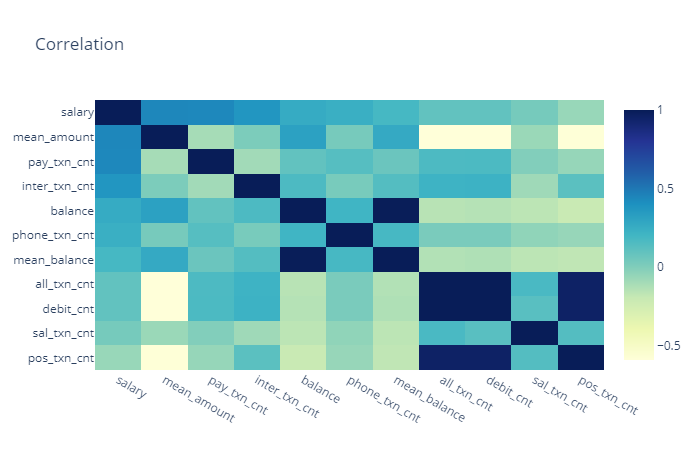

In [54]:
mat_corr = train_df.corr().sort_values(by='salary').sort_values(by='salary', ascending=False, axis=1)
fig = go.Figure(data=go.Heatmap(z=mat_corr,
                                x=mat_corr.columns,
                                y=mat_corr.index,
                                colorscale='YlGnBu'))

fig.update_layout(height=650, width=750,
                  title_text='Correlation')
fig.show()

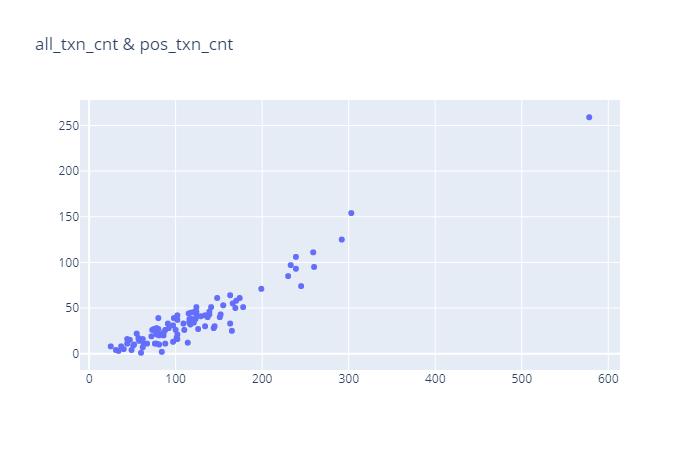

In [55]:
fig = go.Figure(data=go.Scatter(x=train_df['all_txn_cnt'],
                                y=train_df['pos_txn_cnt'],
                                mode='markers',
                                text=train_df['gender']))

fig.update_layout(title='all_txn_cnt & pos_txn_cnt')
fig.show() 
# Almost a perfect linear model between independent variable, 
# but why there is a super extreme value in the upper-right?

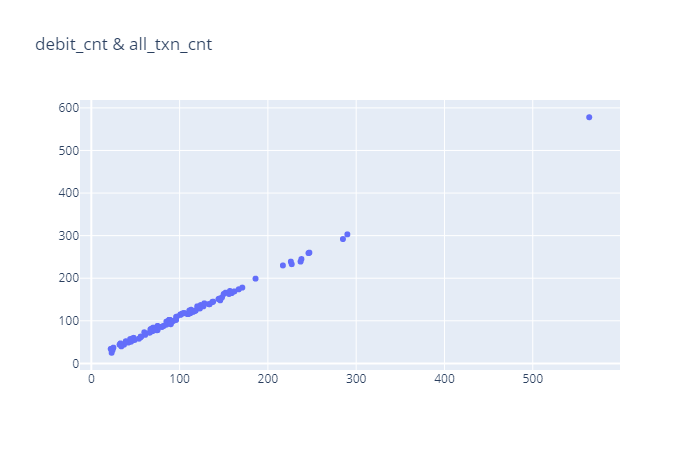

In [56]:
fig = go.Figure(data=go.Scatter(x=train_df['debit_cnt'],
                                y=train_df['all_txn_cnt'],
                                mode='markers',
                                text=train_df['gender']))

fig.update_layout(title='debit_cnt & all_txn_cnt')
fig.show()
# Almost a perfect linear model between independent variable, 
# but why there is a super extreme value in the upper-right?

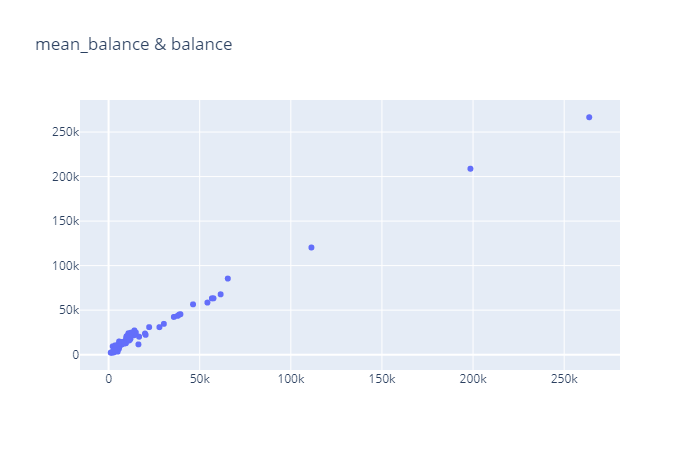

In [57]:
fig = go.Figure(data=go.Scatter(x=train_df['mean_balance'],
                                y=train_df['balance'],
                                mode='markers',
                                text=train_df['gender']))

fig.update_layout(title='mean_balance & balance')
fig.show()
# Almost a perfect linear model between independent variable, 
# but why there is a super extreme value in the upper-right?

### Modelling

In [58]:
# Just re-run from here
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor

In [59]:
train_df = pd.read_excel('Train data ANZ.xlsx')
len(train_df)

100

In [60]:
X = train_df.drop(['customer_id', 'salary'], axis=1)
y = train_df['salary']

In [61]:
# I'm used cross-validation because the data only consist 100 rows
def cv_chooser(model, X, y, cv=5, metrics=None):
    '''
    Function to calculate cross-validation performance with metrics MAE, RMSE, R2score
    * model: the model to use
    * X: the data for training
    * y: target data/dependent variable
    * cv: number of fold (can use K-Fold or Stratified K-Fold, too)
    * metrics: metrics used ('mae', 'rmse'), if not define it'll use the default (r2score) also it's not case sensitive
    '''
    if metrics != None:
        metrics = metrics.lower()
    
    if metrics == "mae":
        mae = cross_val_score(model, X, y, scoring="mean_absolute_error", cv=cv)
        return mae
    elif metrics == 'rmse':
        rmse = -cross_val_score(model, X, y, scoring="neg_root_mean_squared_error", cv=cv)
        return rmse
    return cross_val_score(model, X, y, cv=cv)

In [62]:
# define variable use in the Pipeline later
scaler = RobustScaler(with_centering=False)
ob_feat = list(X.select_dtypes(include=['object']).columns)
encoder = OneHotEncoder(handle_unknown='ignore')
prep = ColumnTransformer(transformers=[('cat', encoder, ob_feat)],remainder='passthrough')

In [63]:
ob_feat

['gender', 'age', 'customer_state']

In [64]:
# Make the model with Pipeline
linR = Pipeline(steps=[('preprocessor', prep),
                       ('scaler', scaler),
                      ('linear_reg', LinearRegression())]) 

eNet = Pipeline(steps=[('preprocessor', prep),
                       ('scaler', scaler),
                      ('elastic_net', ElasticNet(max_iter=1000000))]) 

lass = Pipeline(steps=[('preprocessor', prep),
                       ('scaler', scaler),
                      ('lasso', Lasso(max_iter=1000000))])

rf = Pipeline(steps=[('preprocessor', prep),
                     ('random_forest', RandomForestRegressor())])
            
desT = Pipeline(steps=[('preprocessor', prep),
                     ('decision_tree', DecisionTreeRegressor())])

lgbR = Pipeline(steps=[('preprocessor', prep),
                     ('lightgbm', LGBMRegressor())])

In [65]:
# get the rmse of each model
rmse_lr = cv_chooser(linR, X, y, metrics='rmse').mean()
rmse_enet = cv_chooser(eNet, X, y, metrics='rmse').mean()
rmse_lass = cv_chooser(lass, X, y, metrics='rmse').mean()
rmse_rf = cv_chooser(rf, X, y, metrics='rmse').mean()
rmse_des = cv_chooser(desT, X, y, metrics='rmse').mean()
rmse_lgb = cv_chooser(lgbR, X, y, metrics='rmse').mean()

# get the accuracy of each model
acc_lr = cv_chooser(linR, X, y).mean() * 100
acc_enet = cv_chooser(eNet, X, y).mean() * 100
acc_lass = cv_chooser(lass, X, y).mean() * 100
acc_rf = cv_chooser(rf, X, y).mean() * 100
acc_des = cv_chooser(desT, X, y).mean() * 100
acc_lgb = cv_chooser(lgbR, X, y).mean() * 100

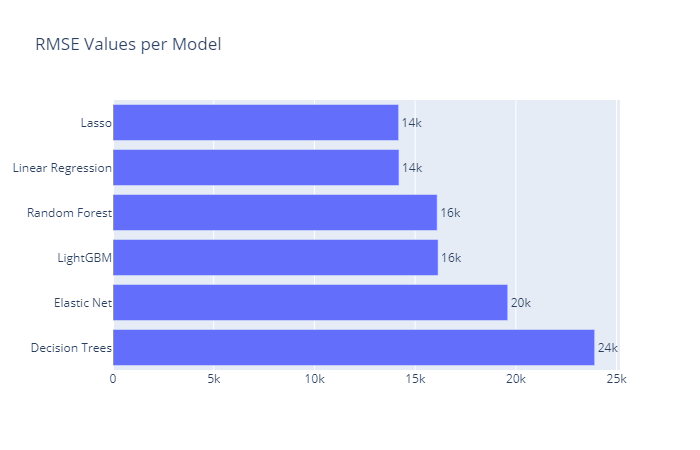

In [66]:
fig = go.Figure()
fig.add_trace(go.Bar(y=["Linear Regression", "Elastic Net", "Lasso", "Random Forest", "Decision Trees", "LightGBM"],
           x = [rmse_lr, rmse_enet, rmse_lass, rmse_rf, rmse_des, rmse_lgb], 
           text = [rmse_lr, rmse_enet, rmse_lass, rmse_rf, rmse_des, rmse_lgb],
           texttemplate = '%{text:.2s}',
           textposition = 'outside',
           orientation = 'h'))

fig.update_layout(title='RMSE Values per Model', yaxis={'categoryorder':'total descending'})
fig.show()

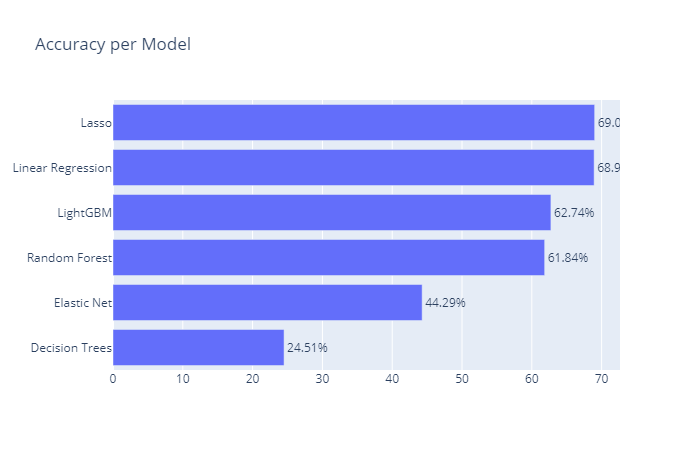

In [67]:
fig = go.Figure()
fig.add_trace(go.Bar(y=["Linear Regression", "Elastic Net", "Lasso", "Random Forest", "Decision Trees", "LightGBM"],
           x = [acc_lr, acc_enet, acc_lass, acc_rf, acc_des, acc_lgb], 
           text = [acc_lr, acc_enet, acc_lass, acc_rf, acc_des, acc_lgb],
           texttemplate = '%{text:.2f}%',
           textposition = 'outside',
           orientation = 'h'))

fig.update_layout(title='Accuracy per Model', yaxis={'categoryorder':'total ascending'})
fig.show()

#### Summary : 
* The best model used lasso with accuracy 69% and the error it's about 14178.18 AUD from the real annual salary for each customer.
* With these performance I suggest ANZ to not use these model even the best one because ideally the good model should be above 80% or 90%, however ANZ can try it in the real world data and maybe it'll be perform better than in this syntethized data.

<strong><center> Thank you </center></strong>